/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Лучшая модель:
Параметры: (2, 1, 2) x (1, 1, 0, 7)
AIC: 869.3163080823226


<ipython-input-44-a4554735d9d4>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values("aic"), x="params", y="aic", palette="viridis")


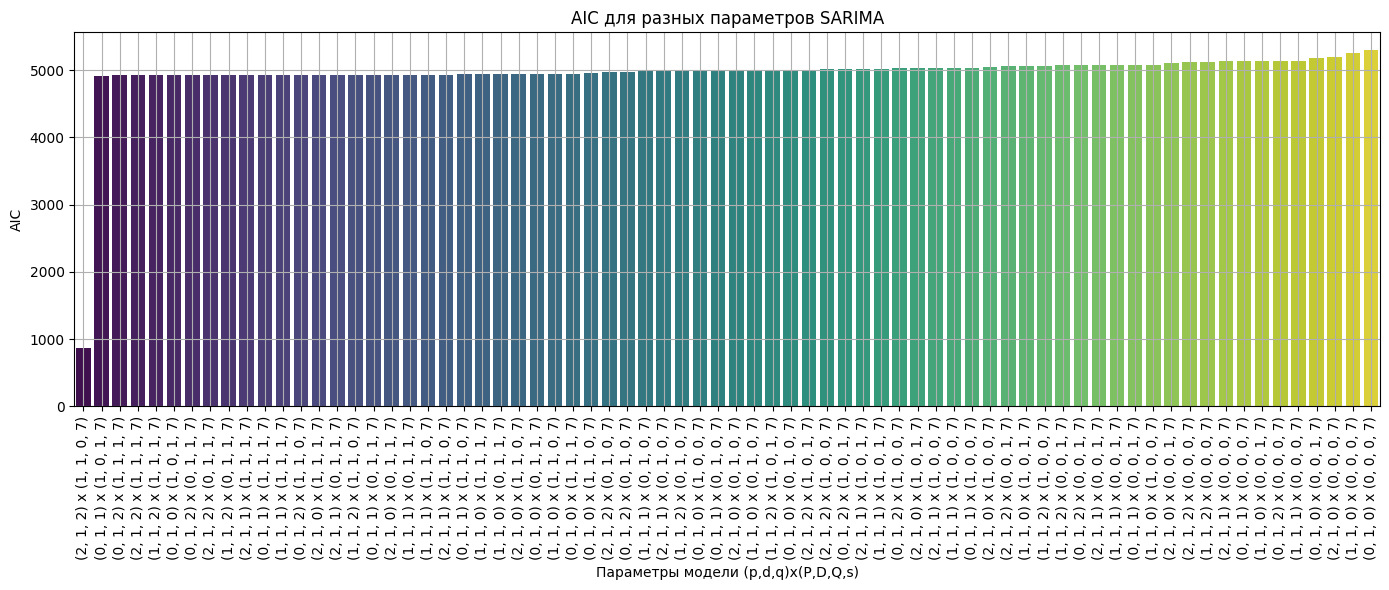

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


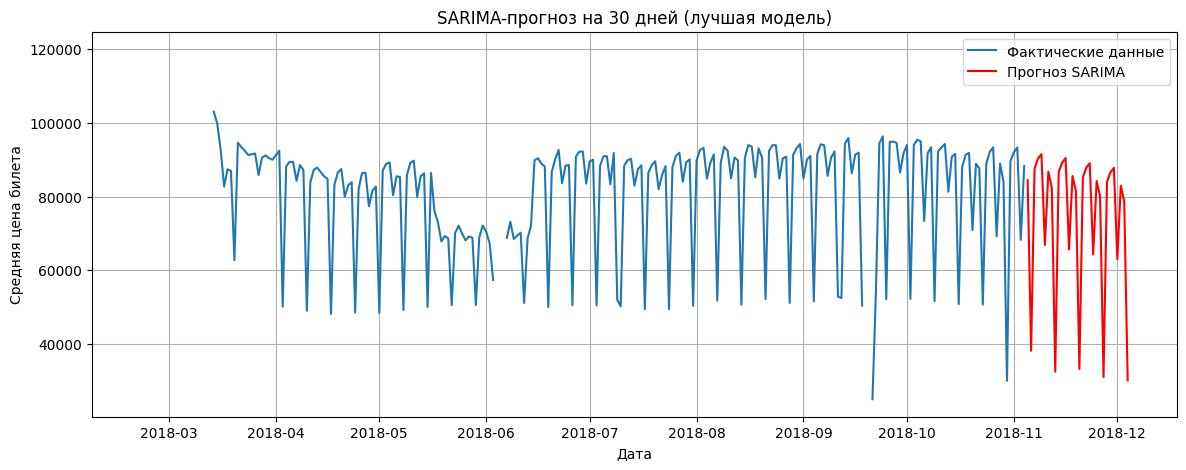

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import itertools

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


path = kagglehub.dataset_download("arashnic/cinema-ticket")
csv_file = next((f for f in os.listdir(path) if f.endswith(".csv")), None)
df = pd.read_csv(os.path.join(path, csv_file))


df["date"] = pd.to_datetime(df["date"])
daily_series = df.groupby("date")["ticket_price"].mean()
daily_series = daily_series.asfreq('D')


result = adfuller(daily_series.dropna())
d = 1 if result[1] > 0.05 else 0


p = q = range(0, 3)
P = Q = range(0, 2)
D = [0, 1]
s = 7

results = []


for order in itertools.product(p, [d], q):
    for seasonal_order in itertools.product(P, D, Q, [s]):
        try:
            model = SARIMAX(daily_series, order=order, seasonal_order=seasonal_order,
                            enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            results.append({
                "order": order,
                "seasonal_order": seasonal_order,
                "aic": aic
            })
        except:
            continue


results_df = pd.DataFrame(results)
results_df["params"] = results_df.apply(lambda row: f"{row['order']} x {row['seasonal_order']}", axis=1)


best_row = results_df.loc[results_df["aic"].idxmin()]
print("Лучшая модель:")
print("Параметры:", best_row["order"], "x", best_row["seasonal_order"])
print("AIC:", best_row["aic"])


plt.figure(figsize=(14, 6))
sns.barplot(data=results_df.sort_values("aic"), x="params", y="aic", palette="viridis")
plt.xticks(rotation=90)
plt.title("AIC для разных параметров SARIMA")
plt.ylabel("AIC")
plt.xlabel("Параметры модели (p,d,q)x(P,D,Q,s)")
plt.tight_layout()
plt.grid(True)
plt.show()


best_model = SARIMAX(
    daily_series,
    order=eval(str(best_row["order"])),
    seasonal_order=eval(str(best_row["seasonal_order"]))
)
best_model_fit = best_model.fit()


forecast = best_model_fit.forecast(steps=30)


plt.figure(figsize=(14, 5))
plt.plot(daily_series, label="Фактические данные")
plt.plot(forecast.index, forecast.values, label="Прогноз SARIMA", color='red')
plt.title("SARIMA-прогноз на 30 дней (лучшая модель)")
plt.xlabel("Дата")
plt.ylabel("Средняя цена билета")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2125
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0467
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0359
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0197
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0210
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0193
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0166
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0150
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0148
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122
Epoch 13/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118
Epoch 14/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096
Epoch 15/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0092
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━

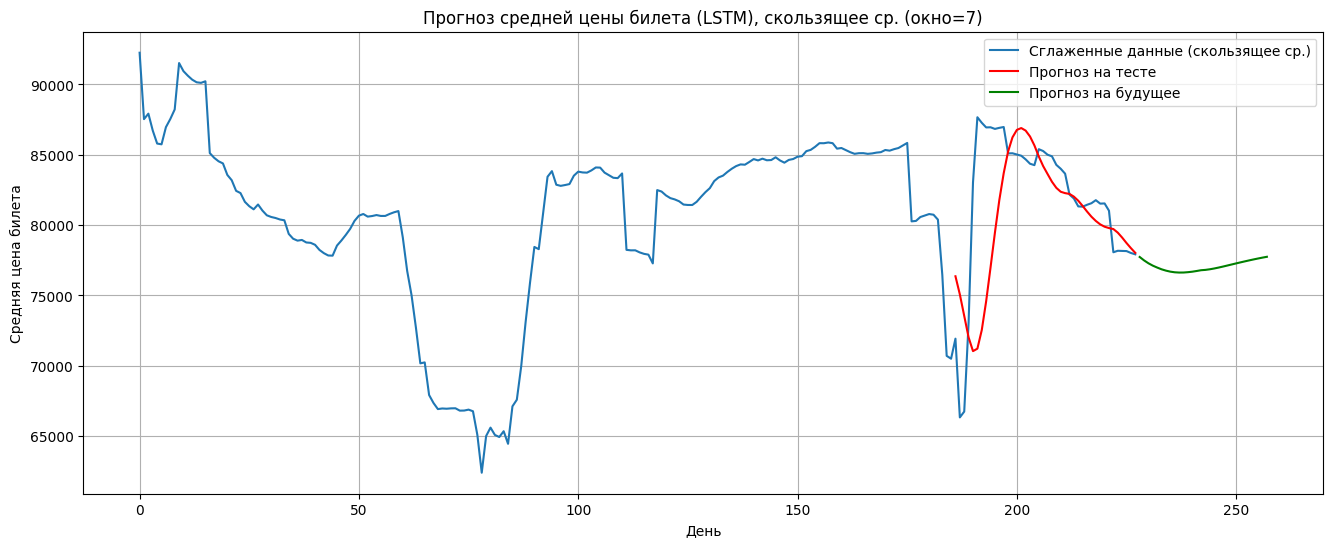

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

window_size = 7

df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby('date')['ticket_price'].mean().reset_index()
df_grouped.rename(columns={'ticket_price': 'value'}, inplace=True)


df_grouped['value_smooth'] = df_grouped['value'].rolling(window=window_size, center=False).mean()
df_grouped.dropna(inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(df_grouped['value_smooth'].values.reshape(-1, 1))

sequence_length = 20
X = []
y = []
for i in range(len(scaled_series) - sequence_length):
    X.append(scaled_series[i:i + sequence_length])
    y.append(scaled_series[i + sequence_length])

X = np.array(X)
y = np.array(y)

train_size = math.floor(len(X) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

future_days = 30
future_predictions = []
last_sequence = scaled_series[-sequence_length:].reshape(1, sequence_length, 1)

for _ in range(future_days):
    next_pred = model.predict(last_sequence)[0, 0]
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.figure(figsize=(16, 6))
plt.plot(range(len(df_grouped)), scaler.inverse_transform(scaled_series), label="Сглаженные данные (скользящее ср.)")
plt.plot(range(train_size + sequence_length, train_size + sequence_length + len(y_pred)), y_pred, label="Прогноз на тесте", color='red')
plt.plot(range(len(df_grouped), len(df_grouped) + future_days), future_predictions_inv, label="Прогноз на будущее", color='green')
plt.title(f"Прогноз средней цены билета (LSTM), скользящее ср. (окно={window_size})")
plt.xlabel("День")
plt.ylabel("Средняя цена билета")
plt.legend()
plt.grid(True)
plt.show()
